Prepare a classification model using Naive Bayes
for salary data

In [38]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [1]:
# uploading train dataset
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Train.csv to SalaryData_Train.csv


In [3]:
# reading train dataset
salarydata_train=pd.read_csv("SalaryData_Train.csv")
salarydata_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
# uploading test dataset
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Test.csv to SalaryData_Test.csv


In [5]:
# reading test dataset
salarydata_test=pd.read_csv("SalaryData_Test.csv")
salarydata_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


# **EDA**

In [6]:
salarydata_train.shape

(30161, 14)

In [8]:
salarydata_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [9]:
salarydata_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [16]:
salarydata_train[salarydata_train.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [17]:
salarydata_train=salarydata_train.drop_duplicates()

In [18]:
salarydata_train.shape

(26903, 14)

In [7]:
salarydata_test.shape

(15060, 14)

In [11]:
salarydata_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [12]:
salarydata_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [13]:
salarydata_test[salarydata_test.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15044,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [14]:
salarydata_test=salarydata_test.drop_duplicates()

In [15]:
salarydata_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [19]:
salarydata_test.shape

(14130, 14)

# **Categorical Variables**

In [47]:
# find categorical variables

categorical = [var for var in salarydata_train.columns if salarydata_train[var].dtype=='O']
categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native',
 'Salary']

In [48]:
salarydata_train[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [22]:
# check missing values in categorical variables
salarydata_train[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           0
dtype: int64

In [23]:
# check labels in workclass variable

salarydata_train.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [24]:

# check labels in occupation variable

salarydata_train.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [25]:
# check labels in native variable

salarydata_train.native.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

# **Numerical Variables**

In [26]:
# find numerical variables

numerical = [var for var in salarydata_train.columns if salarydata_train[var].dtype!='O']
numerical

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [27]:
# view the numerical variables

salarydata_train[numerical].head()

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


In [28]:
# check missing values in numerical variables

salarydata_train[numerical].isnull().sum()

age             0
educationno     0
capitalgain     0
capitalloss     0
hoursperweek    0
dtype: int64

# **Split data into train and test**

In [31]:
X = salarydata_train.drop(['Salary'], axis=1)
y=salarydata_train['Salary']

In [32]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [33]:
X_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
15045,52,Private,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,48,United-States
27002,40,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,70,United-States
13028,56,Private,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female,0,0,10,United-States
19009,44,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,50,United-States
15234,31,Private,1st-4th,2,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,45,Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14004,49,Private,Some-college,10,Divorced,Exec-managerial,Not-in-family,White,Male,14344,0,45,United-States
21516,22,Private,HS-grad,9,Married-spouse-absent,Other-service,Own-child,White,Female,0,0,3,United-States
10370,29,State-gov,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States
11420,32,Private,HS-grad,9,Never-married,Transport-moving,Own-child,White,Female,0,0,35,United-States


In [34]:
X_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
14612,41,Self-emp-inc,Bachelors,13,Widowed,Prof-specialty,Unmarried,White,Female,0,0,40,United-States
18369,34,State-gov,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States
17280,48,Private,5th-6th,3,Divorced,Machine-op-inspct,Unmarried,Other,Female,0,0,40,Dominican-Republic
7329,54,Private,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States
11484,41,Self-emp-not-inc,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,60,Jamaica
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23054,28,Private,Some-college,10,Never-married,Sales,Not-in-family,Other,Male,0,0,40,India
19782,34,Private,HS-grad,9,Married-spouse-absent,Other-service,Unmarried,White,Female,0,0,65,United-States
12473,51,Private,HS-grad,9,Widowed,Prof-specialty,Unmarried,White,Female,0,0,35,United-States
7301,33,Private,7th-8th,4,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico


In [35]:
y_train

15045     <=50K
27002      >50K
13028     <=50K
19009      >50K
15234     <=50K
          ...  
14004      >50K
21516     <=50K
10370     <=50K
11420     <=50K
2765       >50K
Name: Salary, Length: 18832, dtype: object

In [36]:
y_test

14612     <=50K
18369     <=50K
17280     <=50K
7329       >50K
11484     <=50K
          ...  
23054     <=50K
19782     <=50K
12473     <=50K
7301      <=50K
30148     <=50K
Name: Salary, Length: 8071, dtype: object

In [37]:
# checking the shape
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18832, 13), (8071, 13), (18832,), (8071,))

# **LabelEncoder**

In [53]:
string_xcolumns = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [54]:
##Preprocessing the data. As, there are categorical variables
number = LabelEncoder()
for i in string_xcolumns:
        X_train[i]= number.fit_transform(X_train[i])
        X_test[i]=number.fit_transform(X_test[i])

In [61]:
 X_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
15045,52,2,11,9,2,0,0,4,1,0,0,48,37
27002,40,4,11,9,2,4,0,4,1,0,0,70,37
13028,56,2,11,9,2,7,5,4,0,0,0,10,37
19009,44,2,9,13,2,9,0,4,1,0,1902,50,37
15234,31,2,3,2,2,4,0,4,1,0,0,45,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14004,49,2,15,10,0,3,1,4,1,14344,0,45,37
21516,22,2,11,9,3,7,3,4,0,0,0,3,37
10370,29,5,15,10,2,0,0,4,1,0,0,40,37
11420,32,2,11,9,4,13,3,4,0,0,0,35,37


In [62]:
X_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
14612,41,3,9,13,6,9,4,4,0,0,0,40,37
18369,34,5,11,9,2,0,0,4,1,0,0,40,37
17280,48,2,4,3,0,6,4,3,0,0,0,40,5
7329,54,2,15,10,2,11,0,4,1,0,0,45,37
11484,41,4,11,9,4,7,1,2,1,0,0,60,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23054,28,2,15,10,4,11,1,3,1,0,0,40,17
19782,34,2,11,9,3,7,4,4,0,0,0,65,37
12473,51,2,11,9,6,9,4,4,0,0,0,35,37
7301,33,2,5,4,2,6,0,4,1,0,0,40,24


# **Normalmization**

In [63]:
##Normalmization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [64]:
X_train = norm_func(X_train)
X_test =  norm_func(X_test)

In [65]:
X_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
15045,0.479452,0.333333,0.733333,0.533333,0.333333,0.000000,0.0,1.0,1.0,0.000000,0.000000,0.479592,0.948718
27002,0.315068,0.666667,0.733333,0.533333,0.333333,0.307692,0.0,1.0,1.0,0.000000,0.000000,0.704082,0.948718
13028,0.534247,0.333333,0.733333,0.533333,0.333333,0.538462,1.0,1.0,0.0,0.000000,0.000000,0.091837,0.948718
19009,0.369863,0.333333,0.600000,0.800000,0.333333,0.692308,0.0,1.0,1.0,0.000000,0.436639,0.500000,0.948718
15234,0.191781,0.333333,0.200000,0.066667,0.333333,0.307692,0.0,1.0,1.0,0.000000,0.000000,0.448980,0.615385
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14004,0.438356,0.333333,1.000000,0.600000,0.000000,0.230769,0.2,1.0,1.0,0.143441,0.000000,0.448980,0.948718
21516,0.068493,0.333333,0.733333,0.533333,0.500000,0.538462,0.6,1.0,0.0,0.000000,0.000000,0.020408,0.948718
10370,0.164384,0.833333,1.000000,0.600000,0.333333,0.000000,0.0,1.0,1.0,0.000000,0.000000,0.397959,0.948718
11420,0.205479,0.333333,0.733333,0.533333,0.666667,1.000000,0.6,1.0,0.0,0.000000,0.000000,0.346939,0.948718


In [66]:
X_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
14612,0.328767,0.500000,0.600000,0.800000,1.000000,0.692308,0.8,1.00,0.0,0.00000,0.0,0.391753,0.948718
18369,0.232877,0.833333,0.733333,0.533333,0.333333,0.000000,0.0,1.00,1.0,0.00000,0.0,0.391753,0.948718
17280,0.424658,0.333333,0.266667,0.133333,0.000000,0.461538,0.8,0.75,0.0,0.00000,0.0,0.391753,0.128205
7329,0.506849,0.333333,1.000000,0.600000,0.333333,0.846154,0.0,1.00,1.0,0.00000,0.0,0.443299,0.948718
11484,0.328767,0.666667,0.733333,0.533333,0.666667,0.538462,0.2,0.50,1.0,0.00000,0.0,0.597938,0.538462
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23054,0.150685,0.333333,1.000000,0.600000,0.666667,0.846154,0.2,0.75,1.0,0.00000,0.0,0.391753,0.435897
19782,0.232877,0.333333,0.733333,0.533333,0.500000,0.538462,0.8,1.00,0.0,0.00000,0.0,0.649485,0.948718
12473,0.465753,0.333333,0.733333,0.533333,1.000000,0.692308,0.8,1.00,0.0,0.00000,0.0,0.340206,0.948718
7301,0.219178,0.333333,0.333333,0.200000,0.333333,0.461538,0.0,1.00,1.0,0.00000,0.0,0.391753,0.615385


# **Applying naive bayes for classification**

# **MultinomialNB**

In [84]:
# Preparing a naive bayes model on training data set

from sklearn.naive_bayes import MultinomialNB as MB

M_model=MB()
train_pred_multi=M_model.fit(X_train,y_train).predict(X_train)
test_pred_multi=M_model.fit(X_train,y_train).predict(X_test)


In [85]:
train_acc_multi=np.mean(train_pred_multi==y_train)
print('Train acuraccy is ', train_acc_multi)

Train acuraccy is  0.7491503823279524


In [86]:
test_acc_multi=np.mean(test_pred_multi==y_test)
print('Test acuraccy is ',test_acc_multi )

Test acuraccy is  0.7520753314335274


In [87]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, test_pred_multi)

In [88]:
confusion_matrix

array([[6028,    2],
       [1999,   42]])

<Axes: >

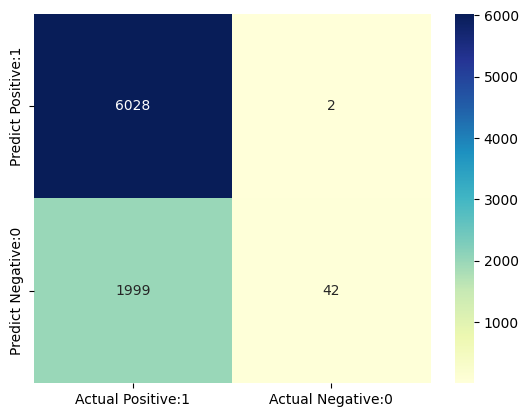

In [89]:
cm_matrix = pd.DataFrame(data=confusion_matrix, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [74]:
#calculating the accuracy of this model w.r.t. this dataset
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,test_pred_multi))

0.7520753314335274


# **GaussianNB**

In [75]:
## GaussianNB for numerical data
from sklearn.naive_bayes import GaussianNB as GB
G_model=GB()
train_pred_gau=G_model.fit(X_train,y_train).predict(X_train)
test_pred_gau=G_model.fit(X_train,y_train).predict(X_test)

In [76]:
train_acc_gau=np.mean(train_pred_gau==y_train)
print('Train acuraccy is ',train_acc_gau)

Train acuraccy is  0.7911002548853017


In [77]:
test_acc_gau=np.mean(test_pred_gau==y_test)
print('Test acuraccy is ',test_acc_gau)

Test acuraccy is  0.7974228720109032


In [78]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, test_pred_gau)

In [79]:
confusion_matrix

array([[5691,  339],
       [1296,  745]])

<Axes: >

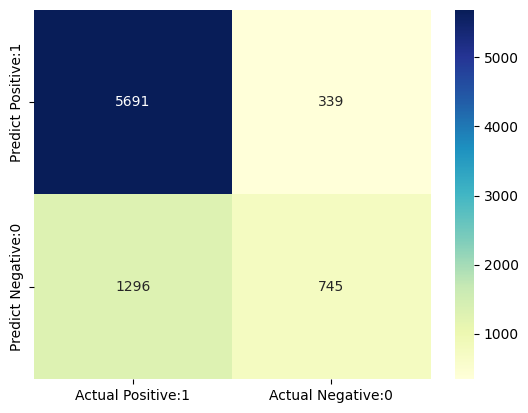

In [82]:
cm_matrix = pd.DataFrame(data=confusion_matrix, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [80]:
#calculating the accuracy of this model w.r.t. this dataset
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,test_pred_gau))

0.7974228720109032
